Try to use ML to build a 3D analyte model in certain year. First, we choose a analyte in a year that has most data. Yet first, we need to rebuild the dataset to deal with the problems we ignored in the pilot analysis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # to plot Chinese words properly

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

# Rebuild complie data
This time we carefully replace the MDL (string) in the data to the half of MDL value obtained from 水利署報告書MDL整理.xlsx. The wprkflow is based on pilot_analysis_02.ipynb.

In [60]:
sheets = ['2019', '2018', '2017', '2016', '2015', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2002', '2001', '2000', '1999', '1997', '1996', '1994', '1993', '1992']
wa_df = pd.DataFrame()

for sheet in sheets:
    wa_ind = pd.read_excel('data/濁水溪沖積扇水質資料1992-2019.xlsx', sheet_name=sheet)
    wa_ind['sheet'] = [sheet for _ in range(len(wa_ind))]
    wa_df = pd.concat([wa_df, wa_ind], axis=0, join='outer')
    
wa_df

,井號,井名,井別,取樣日期,Unnamed: 4,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),...,PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),Turb,TSS(mg/L),sheet,檢驗日期
0,7010211,東芳(1),自記站,2019-06-26,NaN,410.0,7.10,236.0,4.60,0.48,...,7.44,360.0,NaN,0.4,-31.0,1.0,NaN,NaN,2019,NaT
1,7010221,東芳(2),自記站,2019-06-26,NaN,1110.0,9.60,272.0,2.20,0.34,...,7.76,397.0,NaN,0.5,-50.0,1.0,NaN,NaN,2019,NaT
2,7020111,洛津(1),自記站,2019-06-24,NaN,386.0,81.10,454.0,58.40,1.53,...,7.54,979.0,NaN,0.9,-37.0,1.0,NaN,NaN,2019,NaT
3,7020121,洛津(2),自記站,2019-06-24,NaN,361.0,1.90,282.0,61.00,0.36,...,7.90,552.0,NaN,0.4,-56.0,1.8,NaN,NaN,2019,NaT
4,7020131,洛津(3),自記站,2019-06-24,NaN,468.0,2.10,261.0,38.60,0.12,...,7.84,470.0,NaN,0.3,-49.0,3.0,NaN,NaN,2019,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,9150111,田洋(1),自記站,1992-06-08,NaN,492.0,56.61,0,63.99,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08
11,9150121,田洋(2),自記站,1992-06-08,NaN,167.0,8.84,0,28.25,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08
12,9160111,海園(1),自記站,1992-06-08,NaN,141.0,75.50,0,6.49,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08
13,9160121,海園(2),自記站,1992-06-08,NaN,210.0,253.00,0,33.71,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08


## Drop the columns and rows not having any value

In [62]:
wa_df.dropna(axis=1, how='all', inplace=True)
wa_df.dropna(axis=0, how='all', inplace=True)
print(wa_df.shape)

(2852, 42)


Only two columns are compeletly empty.

## Assign id
Since I prefer the later sorting following the years so I switch the order of date and well no. comparing to the pilot works.

In [76]:
sdate = wa_df['取樣日期'].astype(str)
wa_df['id'] = ['{}_{}'.format(i, j) for i, j in zip(sdate, wa_df['井號'])]
wa_df.set_index('id', inplace=True)
wa_df

,井號,井名,井別,取樣日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),NO2_N(mg/L),...,Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),TSS(mg/L),sheet,檢驗日期
id,,,,,,,,,,,,,,,,,,,,,
2019-06-26_7010211,7010211,東芳(1),自記站,2019-06-26,410.0,7.10,236.0,4.60,0.48,NaN,...,25.7,7.44,360.0,NaN,0.4,-31.0,1.0,NaN,2019,NaT
2019-06-26_7010221,7010221,東芳(2),自記站,2019-06-26,1110.0,9.60,272.0,2.20,0.34,NaN,...,26.0,7.76,397.0,NaN,0.5,-50.0,1.0,NaN,2019,NaT
2019-06-24_7020111,7020111,洛津(1),自記站,2019-06-24,386.0,81.10,454.0,58.40,1.53,NaN,...,26.1,7.54,979.0,NaN,0.9,-37.0,1.0,NaN,2019,NaT
2019-06-24_7020121,7020121,洛津(2),自記站,2019-06-24,361.0,1.90,282.0,61.00,0.36,NaN,...,26.4,7.90,552.0,NaN,0.4,-56.0,1.8,NaN,2019,NaT
2019-06-24_7020131,7020131,洛津(3),自記站,2019-06-24,468.0,2.10,261.0,38.60,0.12,NaN,...,25.9,7.84,470.0,NaN,0.3,-49.0,3.0,NaN,2019,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992-06-08_9150111,9150111,田洋(1),自記站,1992-06-08,492.0,56.61,0,63.99,0.00,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08
1992-06-08_9150121,9150121,田洋(2),自記站,1992-06-08,167.0,8.84,0,28.25,0.00,9999.999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08
1992-06-08_9160111,9160111,海園(1),自記站,1992-06-08,141.0,75.50,0,6.49,0.00,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08


Because I decided to treat the duplicates as individuals (pilot_analysis_01.ipynb), I asign additional number behind those ids. This makes every id unique, which will avoid potential confussion later on. There are more than two duplicates so I need to do a little bit more.

In [5]:
wa_du = wa_df[wa_df.index.duplicated()]
wa_clean = wa_df[~wa_df.index.duplicated()]

In [6]:
print(len(wa_clean), len(wa_du))

2352 500


In [7]:
wa_du[wa_du.index.duplicated()]

,井號,井名,井別,取樣日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),NO2_N(mg/L),...,Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),TSS(mg/L),sheet,檢驗日期
id,,,,,,,,,,,,,,,,,,,,,
2000-01-01_8060211,8060211,新民(1),自記站,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,24.55,7.54,514.5,NaN,NaN,NaN,NaN,NaN,2000,NaT
2000-01-01_8060211,8060211,新民(1),自記站,2000-01-01,NaN,NaN,NaN,NaN,0.180,NaN,...,24.12,7.57,541.5,NaN,NaN,NaN,NaN,NaN,2000,NaT
2000-01-01_7010111,7010111,國聖(1),自記站,2000-01-01,NaN,NaN,NaN,NaN,MDL,MDL,...,25.80,NaN,NaN,NaN,2.06,NaN,NaN,NaN,2000,NaT
2000-01-01_7010111,7010111,國聖(1),自記站,2000-01-01,NaN,NaN,NaN,NaN,0.150,MDL,...,24.48,6.55,568.4,NaN,2.06,NaN,NaN,NaN,2000,NaT
2000-01-01_8060211,8060211,新民(1),自記站,2000-01-01,NaN,NaN,NaN,NaN,0.360,MDL,...,22.50,NaN,NaN,NaN,0.45,NaN,NaN,NaN,2000,NaT
2000-01-01_8060211,8060211,新民(1),自記站,2000-01-01,NaN,NaN,NaN,NaN,0.420,MDL,...,22.52,7.78,531.9,NaN,0.45,NaN,NaN,NaN,2000,NaT
1994-07-08_7010111,7010111,國聖(1),自記站,1994-07-08,491.7,16.1,0,776.8,0.595,0.304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,NaT


In [8]:
i = 0
for index in wa_du.index:
    if index == '2000-01-01_8060211':
        print(i)
        break
    i += 1

250


In [9]:
# test
index_pre = '0'
#app = 1
new_index = []

for index in wa_du.index[250:255]:
    if index != index_pre:
        app = 1    
    else:
        app += 1
     
    new_index.append(index + '_' + str(app)) 
    index_pre = index
    
new_index

['2000-01-01_8060211_1',
 '2000-01-01_7010131_1',
 '2000-01-01_8060211_1',
 '2000-01-01_9060111_1',
 '2000-01-01_9160221_1']

Mmm...The duplicates are not in a continues sequence so the codes can't really make _1, _2, _3...

In [10]:
X = wa_du
X.index = [_ + '_1' for _ in X.index]
X_app = X[~X.index.duplicated()]
app = 2

while len(X) != 0:
    X = X[X.index.duplicated()]
    X.index = [_[:-1] + str(app) for _ in X.index]
    X_app = pd.concat([X_app, X[~X.index.duplicated()]], axis=0, join='outer')
    app += 1

In [66]:
X_app

,井號,井名,井別,取樣日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),NO2_N(mg/L),...,Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),TSS(mg/L),sheet,檢驗日期
2009-02-17_7050111_1,7050111,全興(1),自記站,2009-02-17,NaN,251,NaN,96.1,0.150,NaN,...,26.10,6.72,957.0,NaN,1.50,NaN,MDL,NaN,2009,NaT
2006-09-04_9130321_1,9130321,海豐(2),自記站,2006-09-04,NaN,5.2,NaN,10.0,MDL,NaN,...,31.00,7.84,391.0,NaN,0.50,NaN,NaN,NaN,2006,NaT
2001-01-01_7010111_1,7010111,國聖(1),自記站,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.93,NaN,NaN,NaN,2001,NaT
2001-01-01_7010121_1,7010121,國聖(2),自記站,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,27.53,NaN,398.0,NaN,NaN,NaN,NaN,NaN,2001,NaT
2001-01-01_7010131_1,7010131,國聖(3),自記站,2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994-07-08_7010111_2,7010111,國聖(1),自記站,1994-07-08,491.7,16.1,0,776.8,0.595,0.304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,NaT
2000-01-01_8060211_3,8060211,新民(1),自記站,2000-01-01,NaN,NaN,NaN,NaN,0.180,NaN,...,24.12,7.57,541.5,NaN,NaN,NaN,NaN,NaN,2000,NaT
2000-01-01_7010111_3,7010111,國聖(1),自記站,2000-01-01,NaN,NaN,NaN,NaN,0.150,MDL,...,24.48,6.55,568.4,NaN,2.06,NaN,NaN,NaN,2000,NaT
2000-01-01_8060211_4,8060211,新民(1),自記站,2000-01-01,NaN,NaN,NaN,NaN,0.360,MDL,...,22.50,NaN,NaN,NaN,0.45,NaN,NaN,NaN,2000,NaT


In [73]:
print(X_app.shape)
print(X_app.loc[(X_app['井號']==8060211) & (X_app['取樣日期'] == '2000-01-01'), '井別'])

(500, 42)
2000-01-01_8060211_1    自記站
2000-01-01_8060211_2    自記站
2000-01-01_8060211_3    自記站
2000-01-01_8060211_4    自記站
2000-01-01_8060211_5    自記站
Name: 井別, dtype: object


In [78]:
wa_df.loc['2000-01-01_8060211', '井別']

id
2000-01-01_8060211    自記站
2000-01-01_8060211    自記站
2000-01-01_8060211    自記站
2000-01-01_8060211    自記站
2000-01-01_8060211    自記站
2000-01-01_8060211    自記站
Name: 井別, dtype: object

X_app's length fits to wa_du. Also we take 2000-01-01_8060211 as a sample to check. There are 6 2000-01-01_8060211 (1+5) in the wa_df and the duplicates (_1~_5) can be find in X_app. Therefore, it should be fine.

In [13]:
wa_df = pd.concat([wa_clean, X_app], axis=0, join='outer').sort_index()
wa_df

,井號,井名,井別,取樣日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),NO2_N(mg/L),...,Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),TSS(mg/L),sheet,檢驗日期
1992-06-08_9010111,9010111,虎溪(1),自記站,1992-06-08,310.0,17.69,0,65.42,0.00,9999.999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08
1992-06-08_9010221,9010221,石榴(2),自記站,1992-06-08,139.0,8.84,0,35.59,1.48,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08
1992-06-08_9030111,9030111,虎尾(1),自記站,1992-06-08,382.0,12.41,0,139.00,0.00,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08
1992-06-08_9030121,9030121,虎尾(2),自記站,1992-06-08,420.0,23.00,0,121.00,0.00,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08
1992-06-08_9030211,9030211,芳草(1),自記站,1992-06-08,269.0,8.84,0,108.00,0.00,-9999.990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992,1992-06-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-03_9060112,9060112,北港(1),自記站,2019-10-03,477.0,2.10,323.0,10.30,0.02,NaN,...,27.0,8.23,350.0,NaN,1.5,-64.0,1.0,NaN,2019,NaT
2019-10-03_9060122,9060122,北港(2),自記站,2019-10-03,232.0,2.60,245.0,8.40,0.06,NaN,...,28.2,8.02,292.0,NaN,0.4,-54.0,1.0,NaN,2019,NaT
2019-10-03_9180221,9180221,蔡厝(2),自記站,2019-10-03,336.0,7.60,344.0,25.60,0.02,NaN,...,30.6,8.02,309.0,NaN,0.7,-51.0,1.0,NaN,2019,NaT
2019-10-03_9200211,9200211,大溝(1),自記站,2019-10-03,2610.0,112.00,318.0,3.00,0.02,NaN,...,27.3,7.82,441.0,NaN,0.6,-40.0,1.0,NaN,2019,NaT


## Replace MDL values
Also other values should be regarded as MDL.

In [18]:
mdl_df = pd.read_excel('data/水利署報告書MDL整理.xlsx', sheet_name=1)
mdl_df.head()

,Year,ECOLI(個/100mL),CL(mg/L),SO4(mg/L),NO3_N(mg/L),NH3_N(mg/L),Sulfide,TOC(mg/L),Cu(mg/L),Cd(mg/L),...,Mn(mg/L),Aso,Ca(mg/L),Mg(mg/L),Na(mg/L),K(mg/L),HCO3(mg/L),CO3(mg/L),ALK(mg/L),PDF頁碼
0,1992,10,1.4,2.4,0.03,0.02,0.01,0.158,0.009,0.002,...,0.048,0.0004,1.5,0.5,1.79,0.22,1.4,1.4,3.4,NaN
1,1993,10,1.4,2.4,0.03,0.02,0.01,0.158,0.009,0.002,...,0.048,0.0004,1.5,0.5,1.79,0.22,1.4,1.4,3.4,NaN
2,1994,10,1.4,2.4,0.03,0.02,0.01,0.158,0.009,0.002,...,0.048,0.0004,1.5,0.5,1.79,0.22,1.4,1.4,3.4,NaN
3,1995,10,1.4,2.4,0.03,0.02,0.01,0.158,0.009,0.002,...,0.048,0.0004,1.5,0.5,1.79,0.22,1.4,1.4,3.4,NaN
4,1996,10,1.4,2.4,0.03,0.02,0.01,0.158,0.009,0.002,...,0.048,0.0004,1.5,0.5,1.79,0.22,1.4,1.4,3.4,NaN


### Understand how the data look

In [19]:
neg = []
flo = []
# need to repolace the MDL to 0 otherwise it can't be determined if there is negative values
X = wa_df.replace('MDL', 0)
for col in wa_df.columns:
    if X[col].dtype == float:
        neg.append((X[col] < 0).any())
        flo.append(True)
    else:
        neg.append(False)
        flo.append(False)
        print(col)

state_df = pd.DataFrame(
    [[wa_df[col].dtype == float for col in wa_df.columns],
     (wa_df == 'MDL').any(axis=0),
     wa_df.columns.isin(mdl_df.columns),
     flo,
     neg,
     (wa_df == 9999.999).any()
    ], columns=wa_df.columns, index=['pure float', 'have MDL values', 'can find MDL in reports', 'float if MDLs are replaced', 'have negative values', 'have 9999.999']
)
state_df

井號
井名
井別
取樣日期
sheet
檢驗日期


,井號,井名,井別,取樣日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),NO2_N(mg/L),...,Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),Eh,CO3(mg/L),TSS(mg/L),sheet,檢驗日期
pure float,False,False,False,False,True,False,False,False,False,False,...,True,True,True,True,False,True,False,True,False,False
have MDL values,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,True,False,True,False,False,False
can find MDL in reports,False,False,False,False,False,True,True,True,True,False,...,False,False,False,False,True,False,True,False,False,False
float if MDLs are replaced,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
have negative values,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,True,True,True,False,False,False
have 9999.999,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [88]:
state_df.to_excel('results/contition_statement_{}.xlsx'.format(date))
print(date)

20210419


20210419


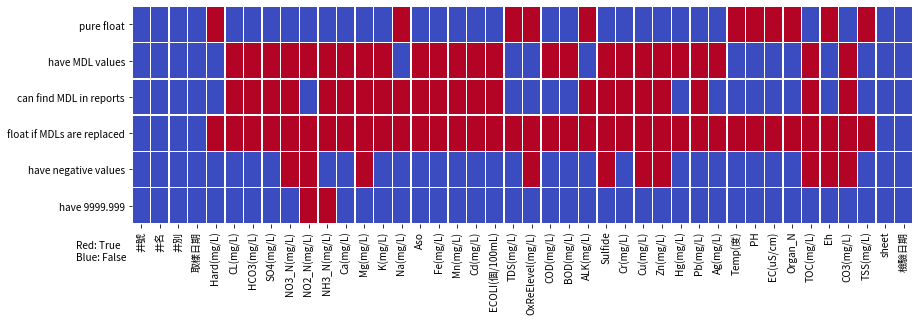

In [89]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.figure(figsize = (14, 4))
plt.text(-3, 7, 'Red: True\nBlue: False')
sns.heatmap(state_df,cbar=False, cmap='coolwarm', linewidths=.5)
plt.savefig('results/data_condition_{}.png'.format(date))
print(date)

In [87]:
print('Total column amount: {}, amount of True:'.format(state_df.shape[1]))
print(state_df.sum(axis=1))

Total column amount: 42, amount of True:
pure float                    11
have MDL values               25
can find MDL in reports       22
float if MDLs are replaced    36
have negative values          10
have 9999.999                  2
dtype: int64


There are only 11 analytes having pure floats. The rest of the analyte (25) are not pure float because they have MDL as string in there values, which can be proved by the first, second, fourth conditions and the amount of pure string columns (6). We found 5 analytes having MDL strings in there values, but not mentioned in the reports. After discuss with Kuo, we decide to discard these five analytes because they rarely have meaningful values in the dataset and not mentioned in the reports. Those 4 analytes (Temp., EC, PH, DO, Eh) having only - in the MDL excel, which also means they shouldn't have MDL issue, really don't have MDL in our dataset. Ten analytes have negative values and two analytes have 9999.99 values, which should be considered as MDL, but they have one analyte overlap (NH3_N). OxReRlevel and Eh normally have negative values (actually they should be the same analyte) and they are all float in the dataset so they are free to go. The negative vlues in the rest 8 analytes should be considered as MDL and replaced by the half MDL value. NO2_N should be excluded as mentioned beforehand so we don't need to deal with its negative issue.

In [15]:
col_mdl = wa_df.columns[(wa_df == 'MDL').any(axis=0)]
print('Below are the columns having MDL in the compile dataset.')
print('Included in the MDL excel: {}'.format(col_mdl[col_mdl.isin(mdl_df.columns)]))
print('Not included in the MDL excel: {}'.format(col_mdl[~col_mdl.isin(mdl_df.columns)]))

Below are the columns having MDL in the compile dataset.
Included in the MDL excel: Index(['CL(mg/L)', 'HCO3(mg/L)', 'SO4(mg/L)', 'NO3_N(mg/L)', 'NH3_N(mg/L)',
       'Ca(mg/L)', 'Mg(mg/L)', 'K(mg/L)', 'Aso', 'Fe(mg/L)', 'Mn(mg/L)',
       'Cd(mg/L)', 'ECOLI(個/100mL)', 'Sulfide', 'Cr(mg/L)', 'Cu(mg/L)',
       'Zn(mg/L)', 'Pb(mg/L)', 'TOC(mg/L)', 'CO3(mg/L)'],
      dtype='object')
Not included in the MDL excel: Index(['NO2_N(mg/L)', 'COD(mg/L)', 'BOD(mg/L)', 'Hg(mg/L)', 'Ag(mg/L)'], dtype='object')


In [16]:
print('The analytes in the MDL excel but don\'t have MDL in the dataset:')
for i in mdl_df.columns[~mdl_df.columns.isin(col_mdl)]:
    print(i)

The analytes in the MDL excel but don't have MDL in the dataset:
Year
Ni(mg/L)
Na(mg/L)
Temp(度)
ALK(mg/L)
EC(uS/cm)
PH
DO(mg/L)
Eh
PDF頁碼


The analytes having only - in the MDL excel, which also means they shouldn't have MDL issue, really don't have MDL in our dataset.

In [17]:
wa_df.loc[:, ['NO2_N(mg/L)', 'COD(mg/L)', 'BOD(mg/L)', 'Hg(mg/L)', 'Ag(mg/L)']].describe()

,NO2_N(mg/L),COD(mg/L),BOD(mg/L),Hg(mg/L),Ag(mg/L)
count,581,511,490,1046,657
unique,61,211,125,8,6
top,MDL,MDL,0,MDL,MDL
freq,357,68,47,716,592


### Start to replace and build new data
1. exclued the five analytes not in MDL excel but having MDL, string columns, OxReElevel and Eh.
1. replace MDL strings to half of MDL to make them all pure float.
1. replace negative values and 9999.999 to half of MDL.
1. Compile Eh, OxReElevel and other string columns together with the modified dataset.

In [20]:
# analytes only but keep sheet
X = wa_df.iloc[:, 4:-1] 
# These are the analyites not in MDL excel but having MDL strings
X = X.loc[:, ~X.columns.isin( ['NO2_N(mg/L)', 'COD(mg/L)', 'BOD(mg/L)', 'Hg(mg/L)', 'Ag(mg/L)', 'Eh', 'OxReElevel(mg/L)'])].copy()

for yr in X.sheet.unique():
    # Only the analytes in the excel have MDL related issues
    # and this make sure the paramter mdl can read in values
    for col in mdl_df.columns[mdl_df.columns.isin(X.columns)]:
        # use the half of the mdl as the replacement
        mdl = mdl_df.loc[mdl_df.Year == int(yr), col] / 2
        X.loc[(X.sheet == yr) & (X.loc[:, col] == 'MDL'), col] = mdl

for yr in X.sheet.unique():
    for col in mdl_df.columns[mdl_df.columns.isin(X.columns)]:
        mdl = mdl_df.loc[mdl_df.Year == int(yr), col] / 2
        X.loc[(X.sheet == yr) & ((X.loc[:, col] == 9999.999) | (X.loc[:, col] < 0)), col] = mdl

wa_compile = pd.concat([
    wa_df[['井號', '井名', '井別', '取樣日期','檢驗日期', 'Eh', 'OxReElevel(mg/L)']], X.apply(pd.to_numeric, axis=0)], 
    axis=1, join='outer')

In [21]:
print(wa_compile.shape)
wa_compile.head()

(2852, 37)


,井號,井名,井別,取樣日期,檢驗日期,Eh,OxReElevel(mg/L),Hard(mg/L),CL(mg/L),HCO3(mg/L),...,Zn(mg/L),Pb(mg/L),Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),CO3(mg/L),TSS(mg/L),sheet
1992-06-08_9010111,9010111,虎溪(1),自記站,1992-06-08,1992-06-08,NaN,0.0,310.0,17.69,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992
1992-06-08_9010221,9010221,石榴(2),自記站,1992-06-08,1992-06-08,NaN,0.0,139.0,8.84,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992
1992-06-08_9030111,9030111,虎尾(1),自記站,1992-06-08,1992-06-08,NaN,0.0,382.0,12.41,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992
1992-06-08_9030121,9030121,虎尾(2),自記站,1992-06-08,1992-06-08,NaN,0.0,420.0,23.00,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992
1992-06-08_9030211,9030211,芳草(1),自記站,1992-06-08,1992-06-08,NaN,0.0,269.0,8.84,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992


20210420


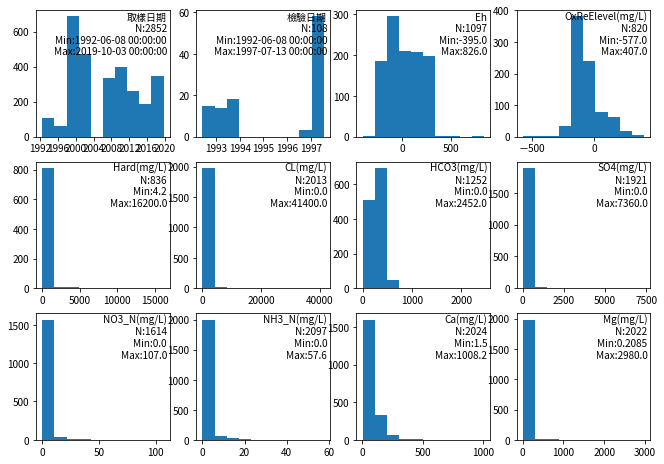

In [56]:
fig, axes = plt.subplots(3, 4, figsize=(11, 7.9))
for col, ax in zip(wa_compile.columns[3:15], axes.ravel()):
    ax.hist(wa_compile[col])
    ax.text(.98, .65, 
            '{}\nN:{}\nMin:{}\nMax:{}'.format(col, (~wa_compile[col].isna()).sum(), wa_compile[col].min(), wa_compile[col].max()),
            transform=ax.transAxes, ha='right')
fig.savefig('results/rebuild_data_hist_1_{}.png'.format(date))
print(date)

20210420


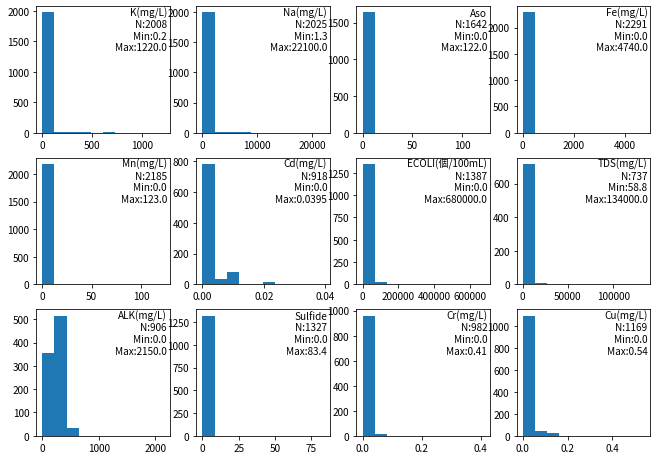

In [57]:
fig, axes = plt.subplots(3, 4, figsize=(11, 7.9))
for col, ax in zip(wa_compile.columns[15:27], axes.ravel()):
    ax.hist(wa_compile[col])
    ax.text(.98, .65, 
            '{}\nN:{}\nMin:{}\nMax:{}'.format(col, (~wa_compile[col].isna()).sum(), wa_compile[col].min(), wa_compile[col].max()),
            transform=ax.transAxes, ha='right')
fig.savefig('results/rebuild_data_hist_2_{}.png'.format(date))
print(date)

20210420


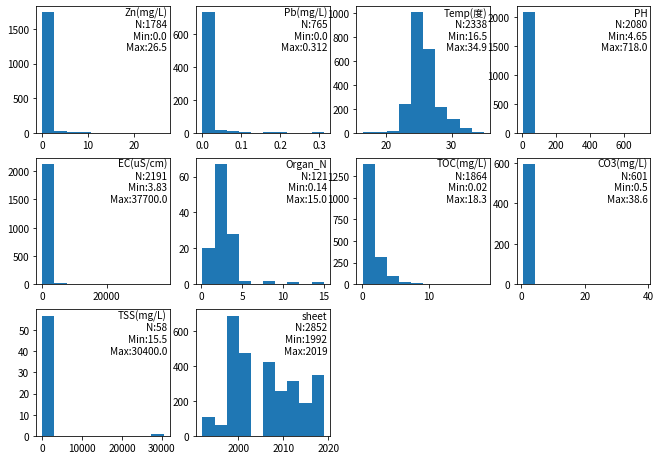

In [58]:
fig, axes = plt.subplots(3, 4, figsize=(11, 7.9))
for col, ax in zip(wa_compile.columns[27:37], axes.ravel()[:-2]):
    ax.hist(wa_compile[col])
    ax.text(.98, .65, 
            '{}\nN:{}\nMin:{}\nMax:{}'.format(col, (~wa_compile[col].isna()).sum(), wa_compile[col].min(), wa_compile[col].max()),
            transform=ax.transAxes, ha='right')
fig.delaxes(axes[-1, -1])
fig.delaxes(axes[-1, -2])
fig.savefig('results/rebuild_data_hist_3_{}.png'.format(date))
print(date)

After checking the histograms, the analytes should be free from the MDL strings issue. The values should be considered as MDL are partly replaced by the half of MDL values (negative values and 9999.999). Others like 0 or extremely large values remain unchanged because they are not marked as MDL and there is no MDL value regarded to those analytes in reports. I suggest let's close the MDL issue now and move on since it cost too much time but only has minor effect. The extremely large values could also be outliers and interfier th later analysis so we need to take care of them later.

## Join Eh and OxReElevel
They are the same analyte actually...

In [21]:
wa_compile = pd.read_excel('data/wra_1992-2019_compile_20210420.xlsx', index_col=0)
print(wa_compile.shape)

(2852, 37)


In [13]:
eh = np.hstack((wa_compile.Eh[~wa_compile.Eh.isna()], wa_compile.loc[~wa_compile['OxReElevel(mg/L)'].isna(), 'OxReElevel(mg/L)']))
eh_idx = np.hstack((wa_compile.index[~wa_compile.Eh.isna()], wa_compile.index[~wa_compile['OxReElevel(mg/L)'].isna()]))
eh_se = pd.Series(eh, index=eh_idx, name='Eh')
eh_se

1999-01-01_10040111      150.0
1999-01-01_10040111_1    150.0
1999-01-01_10040121      291.0
1999-01-01_10050111      256.0
1999-01-01_10050111_1    217.0
                         ...  
2010-09-02_7040141      -127.0
2010-09-02_7050111       -91.0
2010-09-02_7050121       -41.0
2010-09-02_7050131       -87.0
2010-09-02_7050141       -97.0
Name: Eh, Length: 1917, dtype: float64

In [15]:
eh_se[eh_se.index.duplicated()]

Series([], Name: Eh, dtype: float64)

In [18]:
wa_compile = pd.concat([wa_compile.drop(['Eh', 'OxReElevel(mg/L)', 'sheet'], axis=1), eh_se, wa_compile.sheet], axis=1, join='outer')
print(wa_compile.shape)
wa_compile.head()

(2852, 36)


,井號,井名,井別,取樣日期,檢驗日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),...,Pb(mg/L),Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),CO3(mg/L),TSS(mg/L),Eh,sheet
1992-06-08_9010111,9010111,虎溪(1),自記站,1992-06-08,1992-06-08,310.0,17.69,0.0,65.42,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992
1992-06-08_9010221,9010221,石榴(2),自記站,1992-06-08,1992-06-08,139.0,8.84,0.0,35.59,1.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992
1992-06-08_9030111,9030111,虎尾(1),自記站,1992-06-08,1992-06-08,382.0,12.41,0.0,139.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992
1992-06-08_9030121,9030121,虎尾(2),自記站,1992-06-08,1992-06-08,420.0,23.00,0.0,121.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992
1992-06-08_9030211,9030211,芳草(1),自記站,1992-06-08,1992-06-08,269.0,8.84,0.0,108.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1992


In [19]:
wa_compile[wa_compile.index.duplicated()]

,井號,井名,井別,取樣日期,檢驗日期,Hard(mg/L),CL(mg/L),HCO3(mg/L),SO4(mg/L),NO3_N(mg/L),...,Pb(mg/L),Temp(度),PH,EC(uS/cm),Organ_N,TOC(mg/L),CO3(mg/L),TSS(mg/L),Eh,sheet


## Export dataset

In [20]:
wa_compile.to_excel('data/wra_1992-2019_compile_{}.xlsx'.format(date))
print(date)

20210421
